In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
print(sys.version)
#!conda install --yes seaborn


3.7.2 (default, Feb 26 2019, 08:59:10) 
[GCC 4.9.3]


In [2]:
!pwd
!ls *.csv

/usr/WS2/bolet1/apolloDataCollection/dualKnobTesting
/bin/bash: ls: command not found


In [3]:
# Let's open up our CSV file
df = pd.read_csv('threadCountAndPlacement-ETE-XTimeData_VA.csv')

In [4]:
print(df.head())

  progname probSize           policy  trialnum OMP_PROC_BIND  eteXtime
0   nas_bt  medprob  Static,policy=0         0        spread     70.32
1   nas_bt  medprob  Static,policy=0         2        spread     70.78
2   nas_bt  medprob  Static,policy=0         1         close     71.35
3   nas_bt  medprob  Static,policy=0         1        spread     70.80
4   nas_bt  medprob  Static,policy=0         0         close     72.49


In [5]:
# replace policy column with thread count column
numThreadMap = {
                'Static,policy=0': 72,
                'Static,policy=1': 36,
                'Static,policy=2': 18
               }

df['OMP_NUM_THREADS'] = df['policy'].apply(lambda x: numThreadMap[x])

df = df.drop('probSize', axis=1)
df = df.drop('policy', axis=1)

In [6]:
print(df.head())

  progname  trialnum OMP_PROC_BIND  eteXtime  OMP_NUM_THREADS
0   nas_bt         0        spread     70.32               72
1   nas_bt         2        spread     70.78               72
2   nas_bt         1         close     71.35               72
3   nas_bt         1        spread     70.80               72
4   nas_bt         0         close     72.49               72


In [7]:
# let's group all the runs and average the data

grouped = df.groupby(['progname', 'OMP_PROC_BIND', 'OMP_NUM_THREADS'])
meanXtimes = grouped['eteXtime'].mean().reset_index()
meanXtimes['eteXtime_std'] = grouped['eteXtime'].std().reset_index()['eteXtime']

print(meanXtimes.head())

  progname OMP_PROC_BIND  OMP_NUM_THREADS    eteXtime  eteXtime_std
0     comd         close               18  166.279400      0.847225
1     comd         close               36  100.493431      0.734595
2     comd         close               72   86.305930      0.366264
3     comd        spread               18  164.465923      0.338450
4     comd        spread               36  100.460259      0.317517


In [21]:
# let's plot this new averaged data
progs = list(df['progname'].unique())

print(', '.join(progs))

nas_bt, nas_cg, nas_ep, nas_ft, nas_lu, nas_sp, rodinia_cfd, rodinia_heartwall, rodinia_lud, comd, minife, quicksilver, xsbench


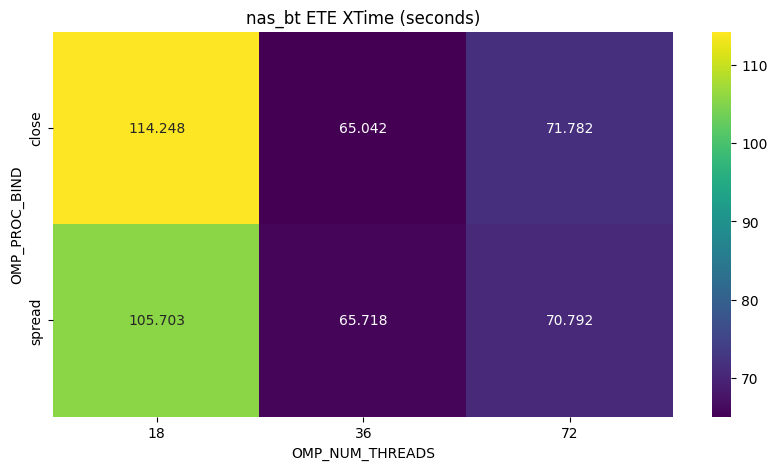

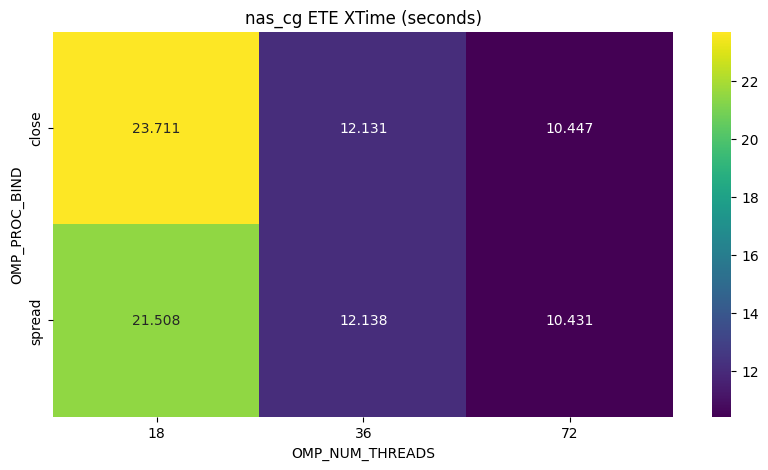

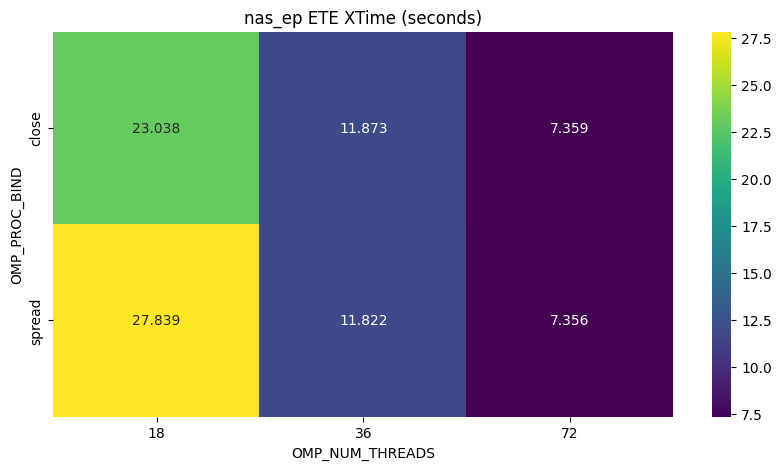

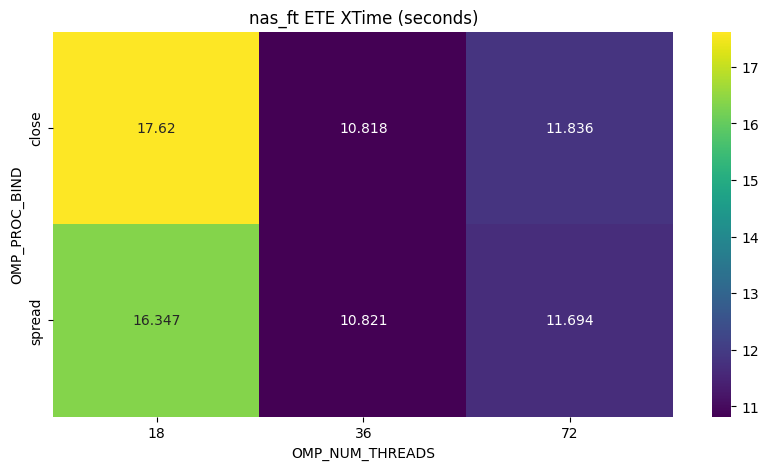

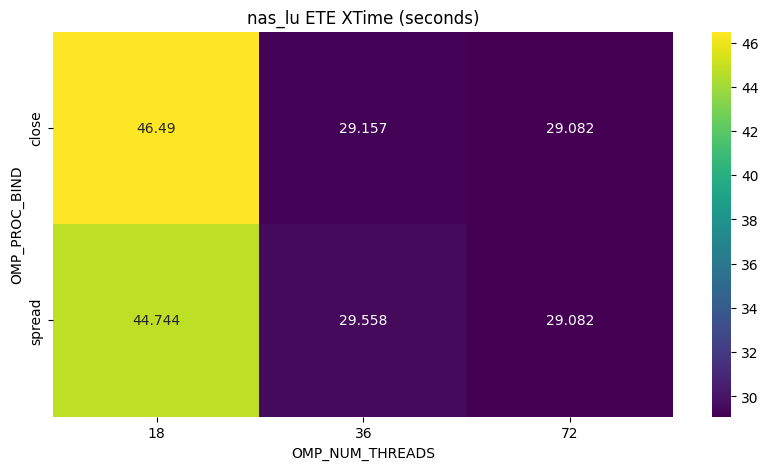

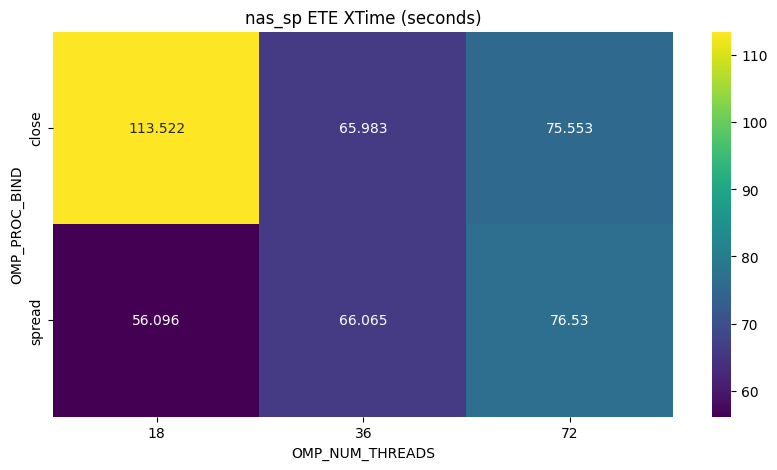

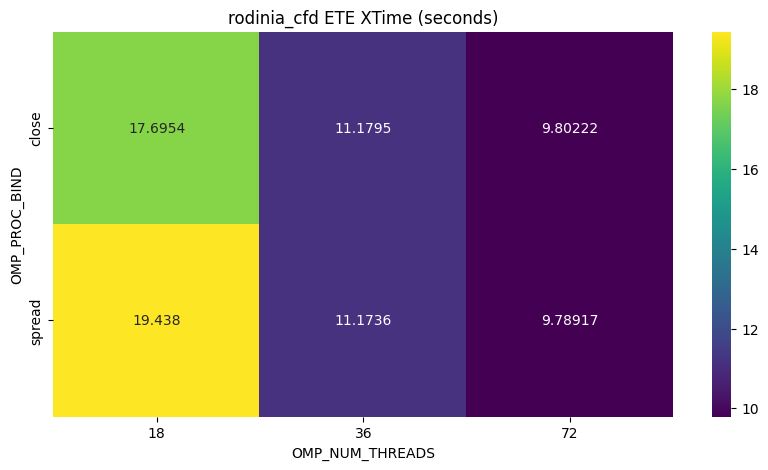

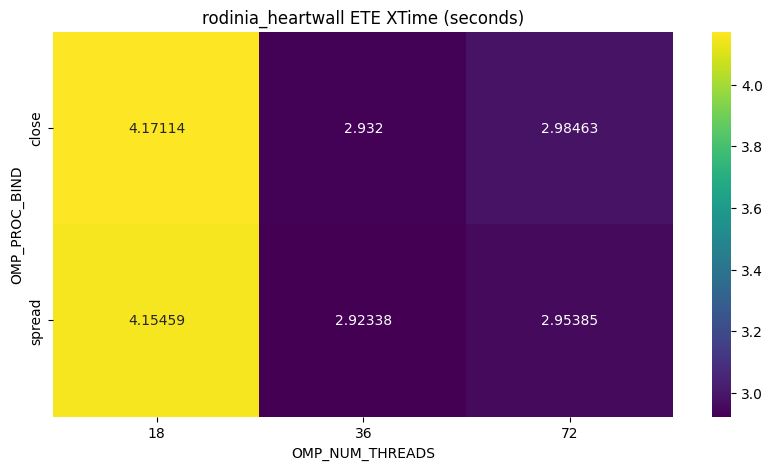

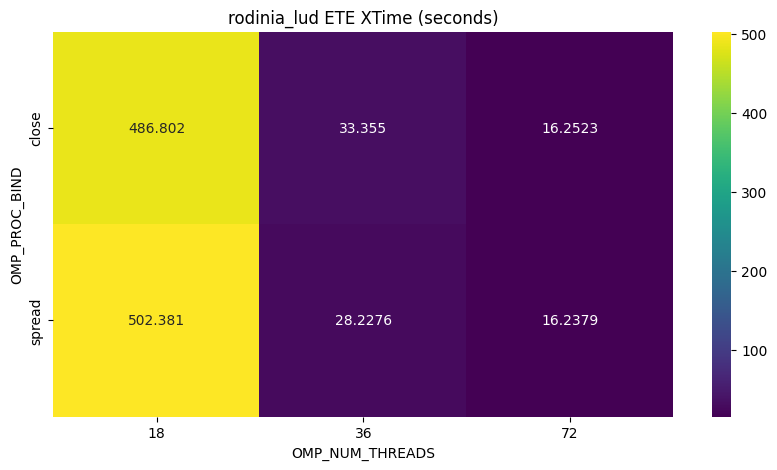

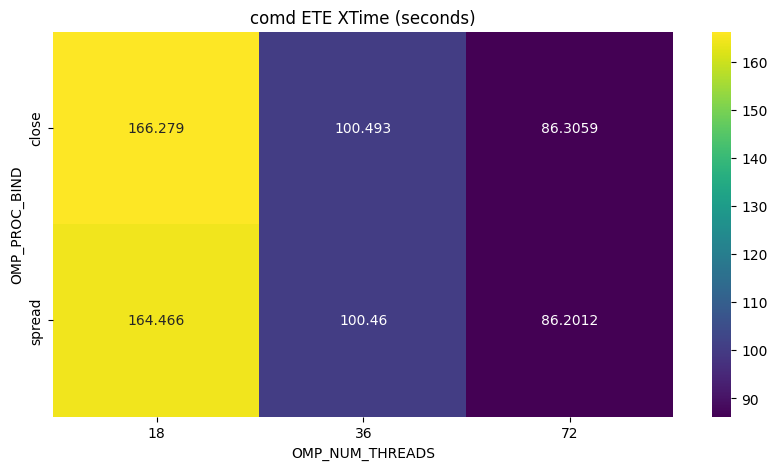

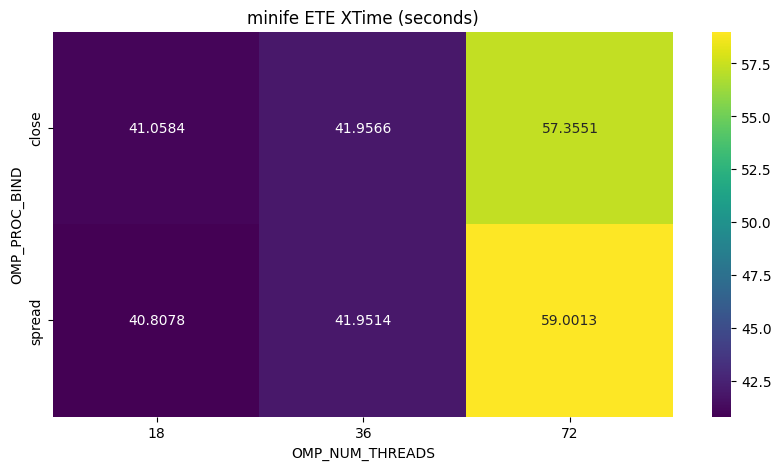

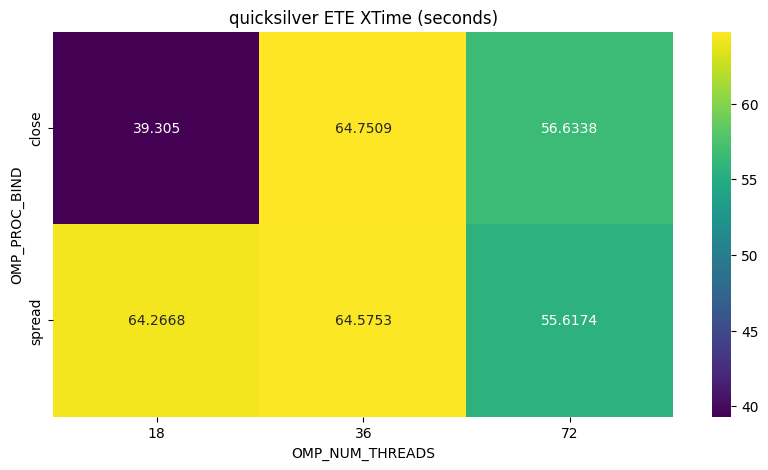

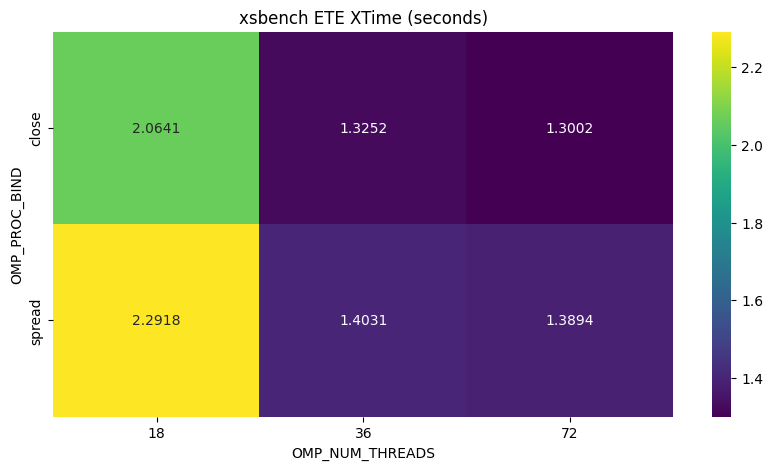

In [19]:

for idx, progname in enumerate(progs):
    # make a new figure
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    
    # get the relevant data for this plot
    data = meanXtimes[meanXtimes['progname'] == progname]
    
    # pivot the dataframe to suit seaborn
    result = data.pivot(index='OMP_PROC_BIND', columns='OMP_NUM_THREADS', values='eteXtime')

    # make the plot
    sns.heatmap(result, annot=True, fmt="g", cmap='viridis', ax=ax)
    ax.set_title(progname+' ETE XTime (seconds)')
    plt.show()
    